In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from tensorflow import keras
#import plaidml.keras
#plaidml.keras.install_backend()

from tensorflow.keras import backend as K

In [2]:
#K.set_session(sess)
#pip install plaidml-keras

#plaidml-setup

In [3]:
train_dir='SplitedDatset/train'
test_dir='SplitedDatset/test'
val_dir='SplitedDatset/val'

In [4]:
datagen = ImageDataGenerator(rescale=1./255,
                                 )

In [5]:
trian_generator = datagen.flow_from_directory(train_dir,target_size=(150,150),classes=['gates','jack','modi','musk','sushmita','trump'],batch_size=20)

Found 609 images belonging to 6 classes.


In [6]:
testgen = ImageDataGenerator(rescale=1./255,
                                  )

In [7]:
test_generator = testgen.flow_from_directory(test_dir,target_size=(150,150),classes=['gates','jack','modi','musk','sushmita','trump'],batch_size=20)

Found 81 images belonging to 6 classes.


In [8]:
valgen = ImageDataGenerator(rescale = 1. / 255)

In [9]:
valid_generator = valgen.flow_from_directory(val_dir,target_size=(150,150),classes=['gates','jack','modi','musk','sushmita','trump'],batch_size=4)

Found 74 images belonging to 6 classes.


In [10]:
def plot_img(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)// rows if len(ims) % 2 ==0 else len(ims)//rows + 1
    for i in range (len(ims)):
        sp=f.add_subplot(rows,cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize =16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')    
            

In [11]:
imgs, labels = next(trian_generator)

/Users/sushmita/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


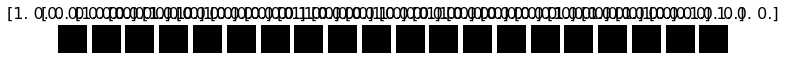

In [12]:
plot_img(imgs , titles=labels)

In [13]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Conv3D,MaxPooling3D
from tensorflow.keras.optimizers import Adam


In [14]:
model=Sequential()

In [15]:
model.add(layers.Conv2D(100,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))



model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

"""

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
"""


model.add(layers.Flatten())
model.add(Dropout(0.8))
#model.add(layers.Conv2D(256,(3,3),activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(Dense(50, activation='relu'))
model.add(layers.Dense(6,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       115328    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [17]:
#model.compile(Adam(lr=0.01),loss='binary_crossentropy',metrics=['acc'])

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [18]:

checkpoint = ModelCheckpoint('bestmodel-{epoch:03d}.h5',verbose=6,monitor='val_acc',save_best_only=True,mode='auto')
history = model.fit(trian_generator,steps_per_epoch=30,epochs=30,callbacks=[checkpoint],validation_data=valid_generator,validation_steps=4)

#'2finalsupersuperfinalbestmodel-{epoch:03d}.h5',


Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 1.7981 - accuracy: 0.1304
Epoch 00001: val_loss improved from inf to 1.80202, saving model to bestmodel-001.h5
4/4 [==============================] - 2s 563ms/step - loss: 1.7981 - accuracy: 0.1304 - val_loss: 1.8020 - val_accuracy: 0.1250
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 1.7743 - accuracy: 0.2500
Epoch 00002: val_loss improved from 1.80202 to 1.74313, saving model to bestmodel-002.h5
4/4 [==============================] - 3s 627ms/step - loss: 1.7743 - accuracy: 0.2500 - val_loss: 1.7431 - val_accuracy: 0.3125
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 1.7576 - accuracy: 0.2000
Epoch 00003: val_loss improved from 1.74313 to 1.72539, saving model to bestmodel-003.h5
4/4 [==============================] - 2s 605ms/step - loss: 1.7576 - accuracy: 0.2000 - val_loss: 1.7254 - val_accuracy: 0.1250
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: 1.74

Epoch 30/100
4/4 [==============================] - ETA: 0s - loss: 1.1915 - accuracy: 0.5507
Epoch 00030: val_loss did not improve from 1.01453
4/4 [==============================] - 2s 552ms/step - loss: 1.1915 - accuracy: 0.5507 - val_loss: 1.2174 - val_accuracy: 0.4375
Epoch 31/100
4/4 [==============================] - ETA: 0s - loss: 1.2013 - accuracy: 0.5000
Epoch 00031: val_loss did not improve from 1.01453
4/4 [==============================] - 2s 606ms/step - loss: 1.2013 - accuracy: 0.5000 - val_loss: 1.2457 - val_accuracy: 0.5000
Epoch 32/100
4/4 [==============================] - ETA: 0s - loss: 1.0679 - accuracy: 0.6000
Epoch 00032: val_loss did not improve from 1.01453
4/4 [==============================] - 3s 681ms/step - loss: 1.0679 - accuracy: 0.6000 - val_loss: 1.3562 - val_accuracy: 0.3750
Epoch 33/100
4/4 [==============================] - ETA: 0s - loss: 1.0310 - accuracy: 0.6232
Epoch 00033: val_loss improved from 1.01453 to 1.00088, saving model to bestmodel-03

Epoch 60/100
4/4 [==============================] - ETA: 0s - loss: 0.6590 - accuracy: 0.7625
Epoch 00060: val_loss did not improve from 0.86394
4/4 [==============================] - 3s 649ms/step - loss: 0.6590 - accuracy: 0.7625 - val_loss: 1.3332 - val_accuracy: 0.4375
Epoch 61/100
4/4 [==============================] - ETA: 0s - loss: 0.5646 - accuracy: 0.8250
Epoch 00061: val_loss did not improve from 0.86394
4/4 [==============================] - 3s 674ms/step - loss: 0.5646 - accuracy: 0.8250 - val_loss: 1.4346 - val_accuracy: 0.3750
Epoch 62/100
4/4 [==============================] - ETA: 0s - loss: 0.7110 - accuracy: 0.7375
Epoch 00062: val_loss did not improve from 0.86394
4/4 [==============================] - 3s 643ms/step - loss: 0.7110 - accuracy: 0.7375 - val_loss: 1.3368 - val_accuracy: 0.2500
Epoch 63/100
4/4 [==============================] - ETA: 0s - loss: 0.4562 - accuracy: 0.8625
Epoch 00063: val_loss did not improve from 0.86394
4/4 [============================

Epoch 90/100
4/4 [==============================] - ETA: 0s - loss: 0.3567 - accuracy: 0.9125
Epoch 00090: val_loss did not improve from 0.75881
4/4 [==============================] - 3s 717ms/step - loss: 0.3567 - accuracy: 0.9125 - val_loss: 1.0130 - val_accuracy: 0.5625
Epoch 91/100
4/4 [==============================] - ETA: 0s - loss: 0.2808 - accuracy: 0.9250
Epoch 00091: val_loss did not improve from 0.75881
4/4 [==============================] - 3s 684ms/step - loss: 0.2808 - accuracy: 0.9250 - val_loss: 0.8510 - val_accuracy: 0.7500
Epoch 92/100
4/4 [==============================] - ETA: 0s - loss: 0.4445 - accuracy: 0.8875
Epoch 00092: val_loss did not improve from 0.75881
4/4 [==============================] - 3s 719ms/step - loss: 0.4445 - accuracy: 0.8875 - val_loss: 1.0806 - val_accuracy: 0.5625
Epoch 93/100
4/4 [==============================] - ETA: 0s - loss: 0.4067 - accuracy: 0.9275
Epoch 00093: val_loss did not improve from 0.75881
4/4 [============================

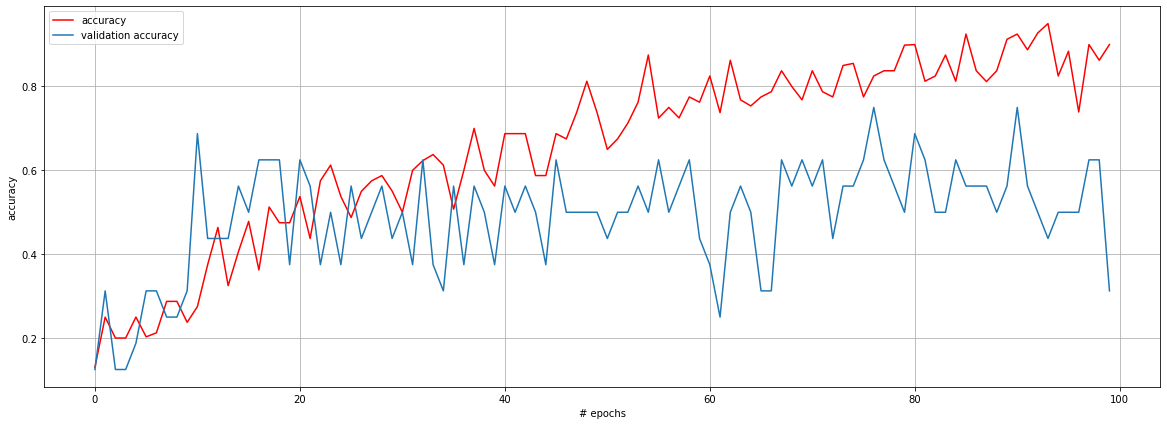

In [19]:
plt.figure(figsize=(20,7))

plt.plot(history.history['accuracy'],'r',label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')

plt.grid(True)
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

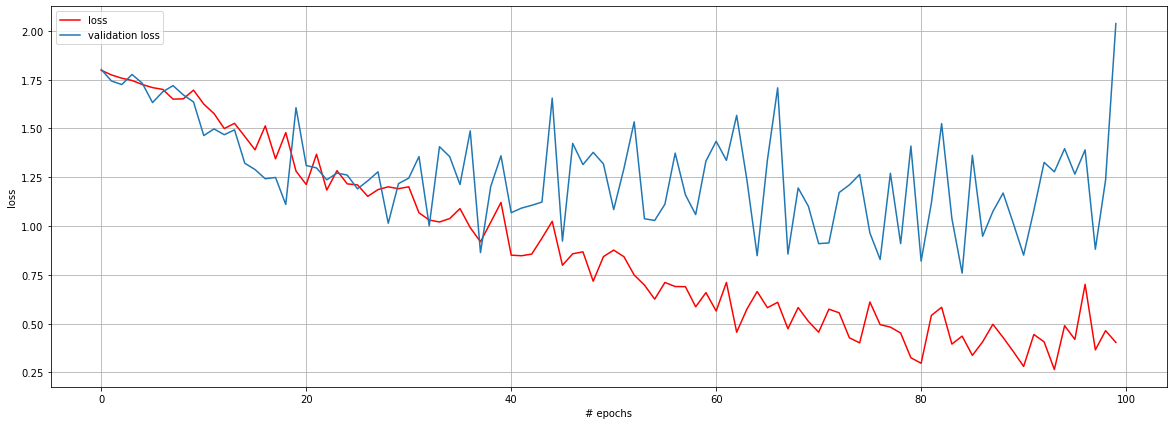

In [20]:
plt.figure(figsize=(20,7))

plt.plot(history.history['loss'],'r',label='loss')
plt.plot(history.history['val_loss'],label='validation loss')

plt.grid(True)
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()